In [1]:
#The purpose of this file is to test which frequency bands are important to VAD by removing select
#bands during classification and viewing how this affects accuracy
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
import scipy.io.wavfile as sio
import scipy as sp
import matplotlib.pyplot as plt
from utils import vectorize
from utils import vectorize_teensy
import csv
tf.enable_eager_execution()

import numpy as np
import time

In [9]:
#load data and process
rate , audio = sio.read('data/audio/d_voice.wav')


#create labels
labels = np.zeros(audio.shape[0])
labels[int(rate*1.44):int(rate*4.075)] = 1
labels[int(rate*9.961):int(rate*13.932)] = 1

data, labels = vectorize(audio,rate,1/4,group_size = 3,full = False, training = True, labels = labels, serial = False)
dim = data.shape
data = data.reshape(dim[0],dim[1],1)
print(data.shape)
print(labels.shape)

(24, 15, 1)
(24, 1)


In [10]:
#load up model and check classification accuracy

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM((1), return_sequences = False)
 
])
#compile model
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['accuracy'])
#load weights
model.load_weights('./weights/my_model')


model.evaluate(data,labels)


24/24 [==============================] - 1s 31ms/sample - loss: 0.5417 - acc: 0.4583


[0.541665256023407, 0.45833334]

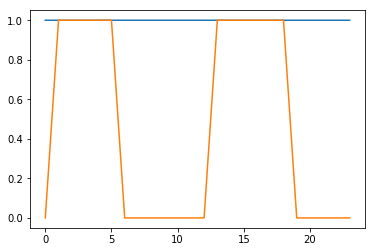

In [13]:
#create 5 modified inputs and run classification on each for accuracy. print out results


prediction = model.predict(data)

#plt.plot(audio)
#plt.show()

plt.plot(prediction)


plt.plot(labels)
plt.show()